In [1]:
%matplotlib inline

import os, sys, glob, re, math, pickle
import phate,scprep,magic,meld
import graphtools as gt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time,random,datetime
from sklearn import metrics
from sklearn import model_selection
from scipy import sparse
from scipy.stats import mannwhitneyu, tiecorrect, rankdata
from statsmodels.stats.multitest import multipletests
import scanpy as sc
import scvelo as scv
import warnings

sys.path.append('/home/ngr4/project/')
from scnd.scripts import data as scnddata
from scnd.scripts import utils as scndutils

# settings
plt.rc('font', size = 9)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['text.usetex']=False
plt.rcParams['legend.frameon']=False
plt.rcParams['axes.grid']=False
plt.rcParams['legend.markerscale']=0.5
sc.set_figure_params(dpi=300,dpi_save=600,
                     frameon=False,
                     fontsize=9)
plt.rcParams['savefig.dpi']=600
sc.settings.verbosity=2
sc._settings.ScanpyConfig.n_jobs=-1
scv.settings.n_jobs=-1
sns.set_style("ticks")


In [2]:
# load old
with open ('/home/ngr4/project/scnd/data/processed/hum_olopc_rnavel.h5ad', 'rb') as f:
    tdata = pickle.load(f)
    f.close()

In [17]:
cmap_ctype = {k:sns.cubehelix_palette(len(tdata.obs.ctype.unique()))[i] for i, k in enumerate(np.sort(tdata.obs.ctype.unique()))}
cmap_genotype = {k:sns.cubehelix_palette(len(tdata.obs.genotype.unique()), rot=-0.5, start=-0.5)[i] for i, k in enumerate(np.sort(tdata.obs.genotype.unique()))}

In [10]:
np.sort(tdata.obs.ctype.unique())

array(['Oligodendrocyte progenitor cells', 'Oligodendrocytes'],
      dtype=object)

In [9]:
sns.cubehelix_palette(2)

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

In [11]:
np.sort(tdata.obs.genotype.unique())

array(['CTRL', 'SCA1'], dtype=object)

In [15]:
sns.cubehelix_palette(2, rot=-.5, start=-0.5)

[[0.9067755504746546, 0.8382269724302, 0.7672165392583007],
 [0.058309643243323536, 0.19410926392125077, 0.15456505471639898]]

0-min elapsed


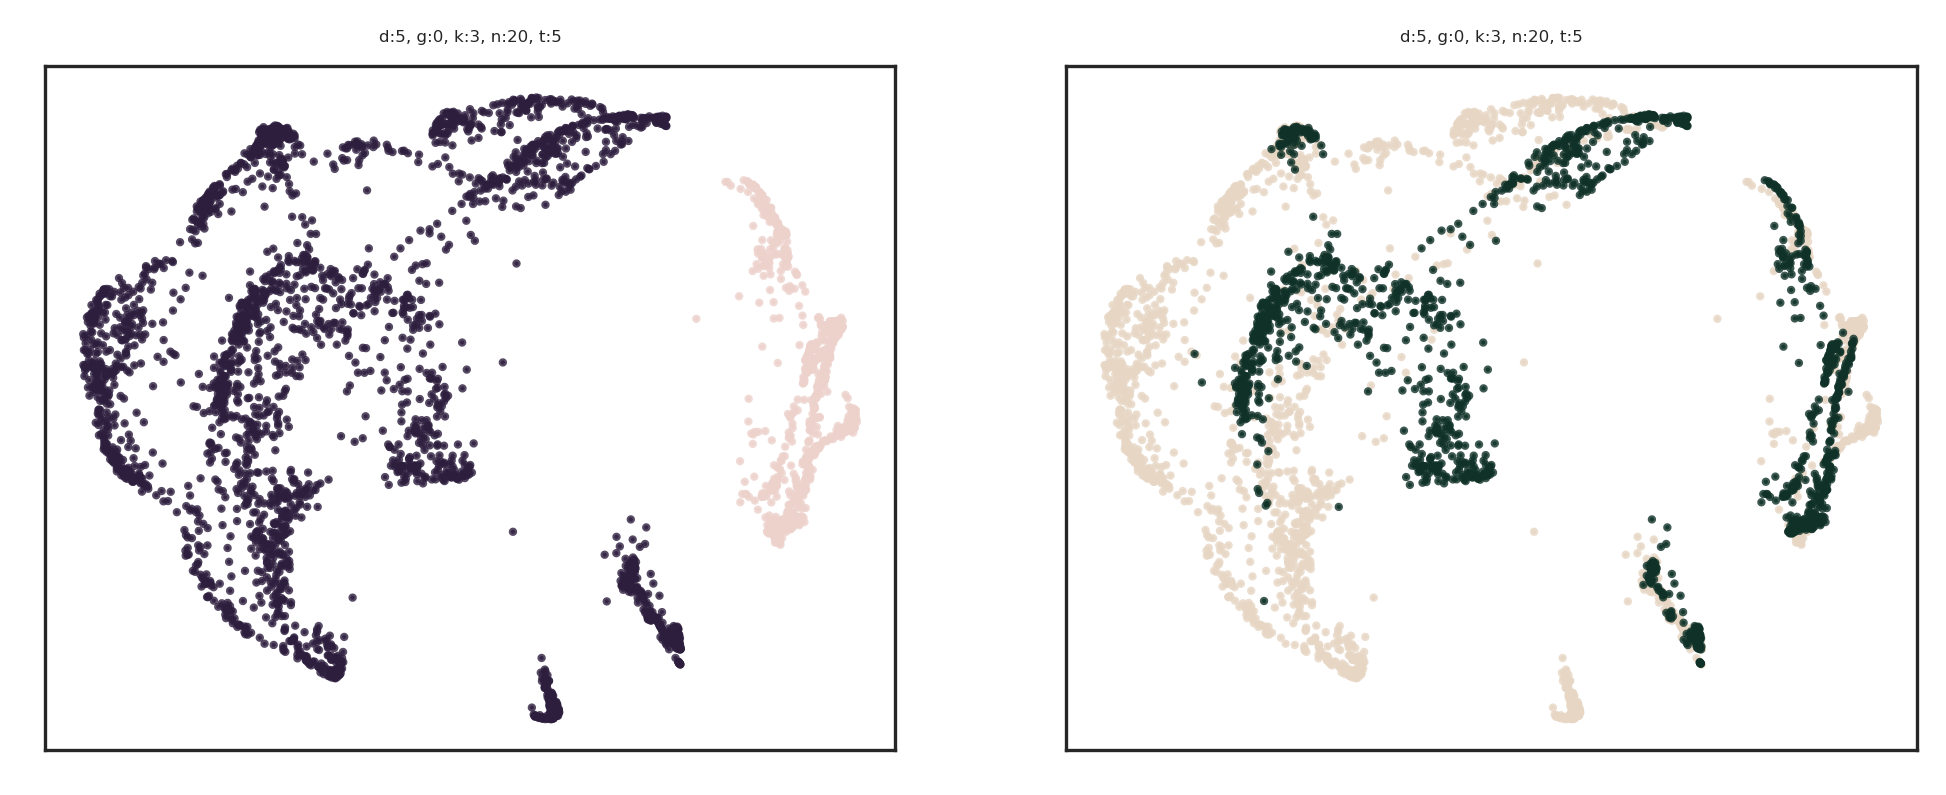

In [21]:
tic = time.time()

from sklearn.model_selection import ParameterGrid
grid = {
    't': [5, 10, 40, 100],
    'gamma': [0, 1],
    'knn': [3, 5, 10, 30, 100],
    'decay': [5, 10, 40, 100],
    'n_pcs': [20, 50, 100],
}

# color
cmap_ctype = {k:sns.cubehelix_palette(len(tdata.obs.ctype.unique()))[i] for i, k in enumerate(np.sort(tdata.obs.ctype.unique()))}
cmap_genotype = {k:sns.cubehelix_palette(len(tdata.obs.genotype.unique()), rot=-0.5, start=-0.5)[i] for i, k in enumerate(np.sort(tdata.obs.genotype.unique()))}

for i, params in enumerate(list(ParameterGrid(grid))):
    tdata = scndutils.phateumap(tdata, recalc_cluster=False, recalc_knn=True, recalc_pca=True, recalc_umap=False,
                                n_pcs=params['n_pcs'], 
                                k=params['knn'], 
                                BBkNN=False, 
                                gamma=params['gamma'], 
                                t=params['t'],
                                decay=params['decay'])
        fig, ax = plt.subplots(1, 2, figsize=(8, 3))
        ax[0].scatter(tdata.obsm['X_phate'][:, 0], 
                      tdata.obsm['X_phate'][:, 1], 
                      s=1, alpha=0.8, rasterized=True,
                      c=[cmap_ctype[s] for s in tdata.obs['ctype']])

        ax[0].set_title(', '.join(['{}:{}'.format(k[0], v) for k,v in params.items()]), fontsize=6)
        ax[0].set_xticks([])
        ax[0].set_yticks([])

        ax[1].scatter(tdata.obsm['X_phate'][:, 0], 
                      tdata.obsm['X_phate'][:, 1], 
                      s=1, alpha=0.8, rasterized=True,
                      c=[cmap_genotype[s] for s in tdata.obs['genotype']])

        ax[1].set_title(', '.join(['{}:{}'.format(k[0], v) for k,v in params.items()]), fontsize=4)
        ax[1].set_xticks([])
        ax[1].set_yticks([])

    fig.savefig('/home/ngr4/project/scnd/results/hum_redo_phateparamscan/humredo_phateparamscan_{}.png'.format(i+1), bbox_inches='tight', dpi=300)

print('{:.0f}-min elapsed'.format((time.time() - tic)/60))

In [ ]:
!mail -s phate_paramscan ngravindra@gmail.com <<< "finished yo"